In [11]:
# Import packages
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import statsmodels
from scipy import stats
from scipy.stats import levene
import scipy.stats
import math
import random
import statistics
import scipy.stats as sp
from sklearn import linear_model
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import levene
!pip install scikit_posthocs
!pip install researchpy
!pip install pingouin
import researchpy as rp
from scipy.stats import anderson
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.power import TTestIndPower
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import statsmodels.formula.api as smf
import pingouin as pg

In [12]:
# load dataset
df = pd.read_csv('2178 Midterm Dataset.csv')

In [13]:
display(df)
df

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65271,2021,Oct-Dec,1055609,6044336.0,316123,Indigenous,F,Aged 25 to 34 years,Not a youth,XX,...,1,0,0,0,NaN,NaN,NaN,NaN,NaN,65272
65272,2021,Oct-Dec,1032758,6031692.0,307736,South Asian,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65273
65273,2021,Oct-Dec,1021067,6064396.0,324057,White,F,Aged 45 to 54 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65274
65274,2021,Oct-Dec,1008998,6008662.0,331870,Unknown or Legacy,M,Aged 17 years and under,Youth (aged 17 years and under),XX,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,65275


,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65271,2021,Oct-Dec,1055609,6044336.0,316123,Indigenous,F,Aged 25 to 34 years,Not a youth,XX,...,1,0,0,0,NaN,NaN,NaN,NaN,NaN,65272
65272,2021,Oct-Dec,1032758,6031692.0,307736,South Asian,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65273
65273,2021,Oct-Dec,1021067,6064396.0,324057,White,F,Aged 45 to 54 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65274
65274,2021,Oct-Dec,1008998,6008662.0,331870,Unknown or Legacy,M,Aged 17 years and under,Youth (aged 17 years and under),XX,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,65275


In [14]:
#Data Cleaning
columns_to_extract = columns_to_extract = ['Sex', 'StripSearch', 'Youth_at_arrest__under_18_years', 'PersonID', 'Perceived_Race']
working_df = df.loc[:, columns_to_extract]
#divide the age group
working_df['Youth_at_arrest__under_18_years'] = working_df['Youth_at_arrest__under_18_years'].replace(['Not a youth'], 'Adult')
working_df['Youth_at_arrest__under_18_years'] = working_df['Youth_at_arrest__under_18_years'].replace(['Youth (aged 17 and younger)'], 'Youth')
working_df['Youth_at_arrest__under_18_years'] = working_df['Youth_at_arrest__under_18_years'].replace(['Youth (aged 17 years and under)'], 'Youth')
#divide the perceived race into minority and majority
working_df['Perceived_Race'] = working_df['Perceived_Race'].replace(['White'], 'Majority')
working_df['Perceived_Race'] = working_df['Perceived_Race'].replace(['Unknown or Legacy'], 'Minority')
working_df['Perceived_Race'] = working_df['Perceived_Race'].replace(['Black'], 'Minority')
working_df['Perceived_Race'] = working_df['Perceived_Race'].replace(['Indigenous'], 'Majority')
working_df['Perceived_Race'] = working_df['Perceived_Race'].replace(['South Asian'], 'Minority')
working_df['Perceived_Race'] = working_df['Perceived_Race'].replace(['Latino'], 'Minority')
working_df['Perceived_Race'] = working_df['Perceived_Race'].replace(['Middle-Eastern'], 'Minority')
working_df['Perceived_Race'] = working_df['Perceived_Race'].replace(['East/Southeast Asian'], 'Minority')
working_df['Sex'] = working_df['Sex'].replace(['U'], 'M')
#create total_arrest col
working_df['total_arrest'] = working_df.groupby('PersonID').PersonID.transform('count')
print(working_df)

      Sex  StripSearch Youth_at_arrest__under_18_years  PersonID  \
0       M            0                           Adult    326622   
1       M            0                           Adult    326622   
2       M            0                           Adult    326622   
3       M            0                           Adult    327535   
4       M            0                           Adult    327535   
...    ..          ...                             ...       ...   
65271   F            0                           Adult    316123   
65272   M            0                           Adult    307736   
65273   F            0                           Adult    324057   
65274   M            0                           Youth    331870   
65275   M            0                           Adult    310583   

      Perceived_Race  total_arrest  
0           Majority             3  
1           Majority             3  
2           Minority             3  
3           Minority             3 

(65276, 6)
Sex                                object
StripSearch                         int64
Youth_at_arrest__under_18_years    object
PersonID                            int64
Perceived_Race                     object
total_arrest                        int64
dtype: object
the descriptive statistic of total arrest is count    65276.000000
mean         4.133096
std          5.402883
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max         54.000000
Name: total_arrest, dtype: float64
Minority    35615
Majority    29657
Name: Perceived_Race, dtype: int64


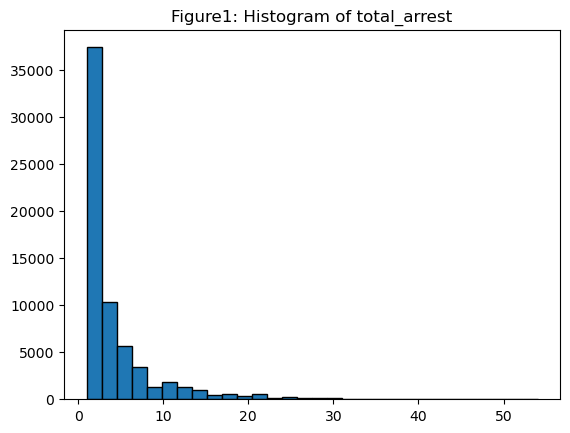

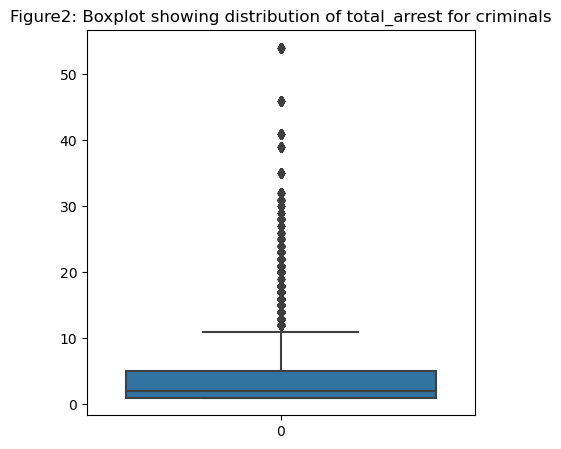

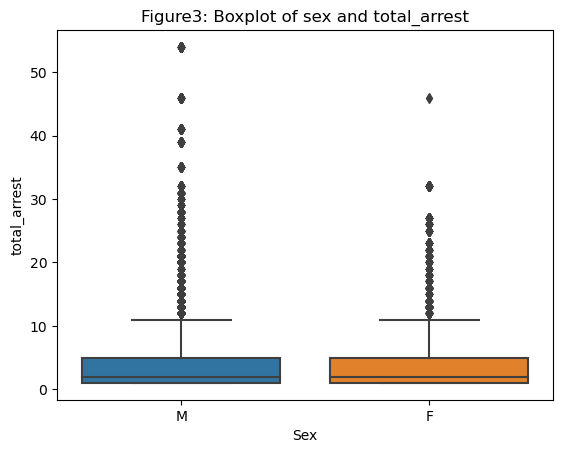

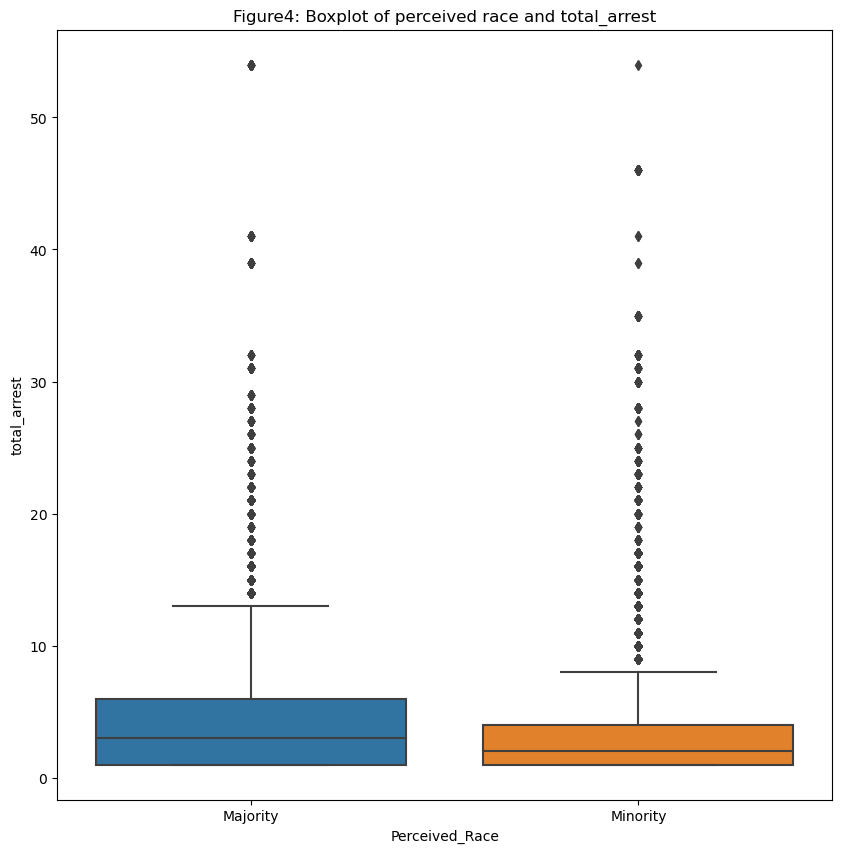

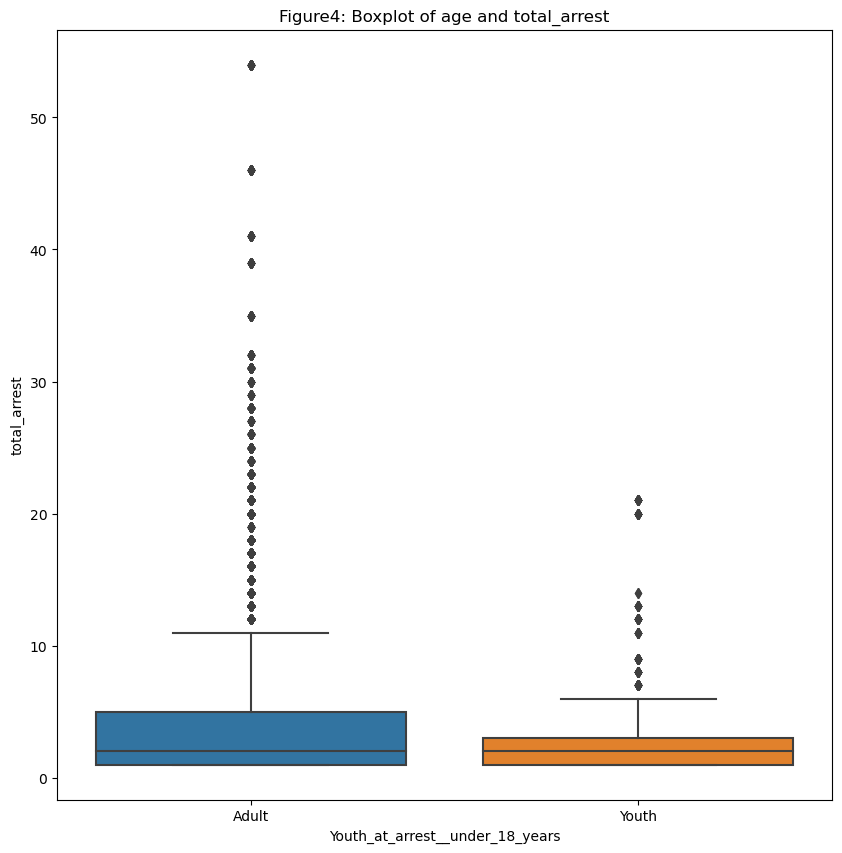

statistic: 20664.224421499937
critical values: [0.576 0.656 0.787 0.918 1.092]
significance levels: [15.  10.   5.   2.5  1. ]
statistic: 20664.224421499937
critical values: [0.576 0.656 0.787 0.918 1.092]
significance levels: [15.  10.   5.   2.5  1. ]


In [15]:
##EDA
working_df.head()
print(working_df.shape)
print(working_df.dtypes)
#the descriptive statistic of total arrest
total_arrest = working_df["total_arrest"].describe()
print('the descriptive statistic of total arrest is', total_arrest)
print(working_df['Perceived_Race'].value_counts())
#plot the distribution of the total_arrest col
plt.hist(working_df["total_arrest"], bins=30, edgecolor='black')
plt.title('Figure1: Histogram of total_arrest')
plt.show()
plt.figure(figsize= (5,5))
sns.boxplot(data = working_df['total_arrest'])
plt.title('Figure2: Boxplot showing distribution of total_arrest for criminals')
plt.xlabel('')
plt.ylabel('')
plt.show()


#box plot of sex and total arrest
sns.boxplot(data = working_df, x = 'Sex', y = 'total_arrest')
plt.title('Figure3: Boxplot of sex and total_arrest')
plt.show()

#box plot of Perceived_race and total arrest
plt.figure(figsize= (10,10))
sns.boxplot(data = working_df, x = 'Perceived_Race', y = 'total_arrest')
plt.title('Figure4: Boxplot of perceived race and total_arrest')
plt.show()

#box plot of age group and total arrest
plt.figure(figsize= (10,10))
sns.boxplot(data = working_df, x = 'Youth_at_arrest__under_18_years', y = 'total_arrest')
plt.title('Figure4: Boxplot of age and total_arrest')
plt.show()

#Normality Assumption Check using anderson darling test On StripSearch
ad1 = anderson(working_df["StripSearch"])
# Print results
print("statistic:", ad1.statistic)
print("critical values:", ad1.critical_values)
print("significance levels:", ad1.significance_level)


#perform anderson darling test on Total Arrest
ad2 = anderson(working_df["StripSearch"])
# Print results
print("statistic:", ad2.statistic)
print("critical values:", ad2.critical_values)
print("significance levels:", ad2.significance_level)


# function to calculate pooled_standard_deviation
def pooled_standard_deviation(sample1,sample2):
    #calculate the sample size
    n1, n2 = len(sample1), len(sample2)
    #calculate the variances
    var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

# function to calculate Cohen's d for independent samples
def Cohens_d(sample1, sample2):
    u1, u2 = np.mean(sample1), np.mean(sample2)
    s_pooled = pooled_standard_deviation(sample1, sample2)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)


In [16]:
#perform anderson darling test on Total Arrest
ad2 = anderson(working_df["total_arrest"])
# Print results
print("statistic:", ad2.statistic)
print("critical values:", ad2.critical_values)
print("significance levels:", ad2.significance_level)

statistic: 7688.853958205262
critical values: [0.576 0.656 0.787 0.918 1.092]
significance levels: [15.  10.   5.   2.5  1. ]


In [17]:
from pingouin import ancova
anco_df = working_df[['total_arrest', 'Perceived_Race', 'StripSearch']].copy()
print(anco_df['total_arrest'].unique())
print(anco_df['Perceived_Race'].unique())
print(anco_df['StripSearch'].unique())
#isolate columns of interest into a new df
df_1way = anco_df[['total_arrest', 'Perceived_Race', 'StripSearch']].copy()
print(df_1way.head())
print(df_1way.info())
model = ols("total_arrest ~ Perceived_Race + StripSearch", data=df_1way).fit()
ancova_results = sm.stats.anova_lm(model, typ=2)
print(ancova_results)

groups = df_1way.groupby("Perceived_Race")["total_arrest"].apply(list)

# Perform Levene's test
levene_test = stats.levene(*groups)
print("Levene's test statistic:", levene_test.statistic)
print("Levene's test p-value:", levene_test.pvalue)

[ 3  7  1  8  2  4 22  6 16  5  9 11 10 14 12 20 13 28 46 15 17 41 23 24
 25 21 18 32 26 31 27 19 39 29 30 35 54]
['Majority' 'Minority' nan]
[0 1]
   total_arrest Perceived_Race  StripSearch
0             3       Majority            0
1             3       Majority            0
2             3       Minority            0
3             3       Minority            0
4             3       Minority            0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65276 entries, 0 to 65275
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   total_arrest    65276 non-null  int64 
 1   Perceived_Race  65272 non-null  object
 2   StripSearch     65276 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ MB
None
                      sum_sq       df            F         PR(>F)
Perceived_Race  2.847961e+04      1.0  1008.910361  9.927014e-220
StripSearch     3.229674e+04      1.0  1144.135027  1.209988e-248
Residua

Proportion of males strip searched: 0.12377751191629162
Proportion of females strip searched: 0.10168819846239201
Welch t-test results for gender for RQ1: t = 7.243, p = 0.000
Levene test statistic: 47.23003233550741
p-value: 6.368996981883267e-12
Proportion of males strip searched: 0.12085033904296687
Proportion of females strip searched: 0.09204470742932282
Welch t-test results for age for RQ1: t = 5.332, p = 0.000
Levene test statistic: 22.87730617638612
p-value: 1.7305484664029294e-06
Proportion of males strip searched: 0.11029060788993401
Proportion of females strip searched: 0.13055939575816838
Welch t-test results for perceived race for RQ1: t = -7.900, p = 0.000
Levene test statistic: 63.241041045294466
p-value: 1.8580845533729755e-15
12617
Effect size (Cohen's D) for Gender vs StripSearch: 0.06811951277755947
Sample Size of nobs1: 2097.111 needed for ms
Actual size of ms: 52659
Sample Size of nobs2: 8752.616 needed for fs
Actual size of fs: 12617


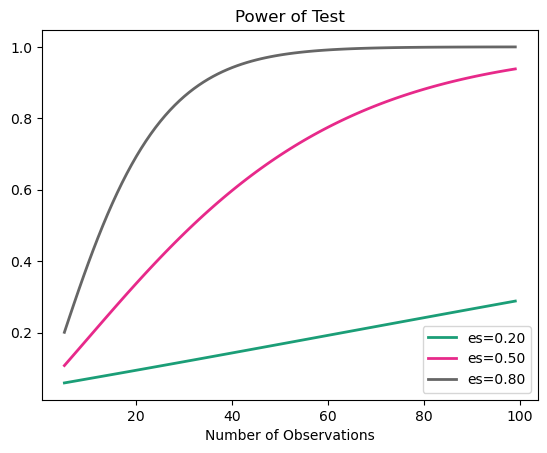

Effect size (Cohen's D) for age group vs StripSearch: 0.0888148826954028
Sample Size of nobs1: 21353.383 needed for AS
Actual size of AS: 62234
Sample Size of nobs2: 1043.754 needed for YS
Actual size of YS: 3042


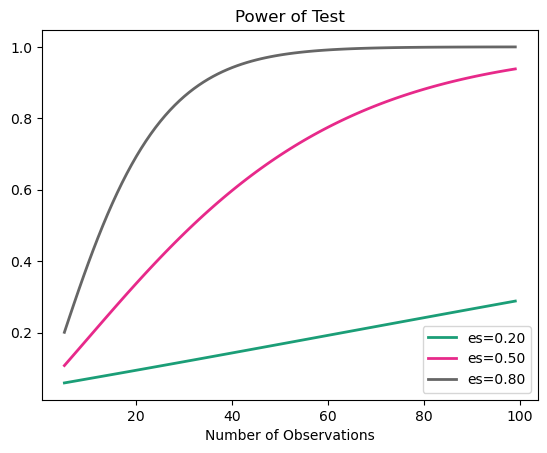

Effect size (Cohen's D) for Perceived_Race vs StripSearch: 0.06251480522037485
Sample Size of nobs1: 43097.653 needed for MaS
Actual size of MaS: 29657
Sample Size of nobs2: 2106.615 needed for MiS
Actual size of MiS: 35615


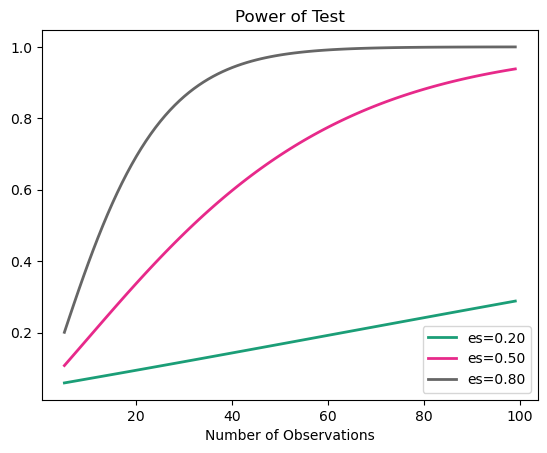

In [18]:
#RQ2 What is the relationship between demographic status and likelihood of being conducted stip search.

#t-test gender and stip search
strip_search_prop = working_df.groupby("Sex")["StripSearch"].mean()
t_stat, p_value = ttest_ind(working_df[working_df["Sex"] == "M"]["StripSearch"], working_df[working_df["Sex"] == "F"]["StripSearch"], equal_var=False)
# Print the results
print("Proportion of males strip searched:", strip_search_prop["M"])
print("Proportion of females strip searched:", strip_search_prop["F"])
print("Welch t-test results for gender for RQ1: t = {:.3f}, p = {:.3f}".format(t_stat, p_value))
#perform equal variance test
test_statistic, p_value = levene(working_df[working_df["Sex"] == "M"]["StripSearch"], working_df[working_df["Sex"] == "F"]["StripSearch"])
print("Levene test statistic:", test_statistic)
print("p-value:", p_value)

#t-test age and stip search
strip_search_prop = working_df.groupby("Youth_at_arrest__under_18_years")["StripSearch"].mean()
t_stat, p_value = ttest_ind(working_df[working_df["Youth_at_arrest__under_18_years"] == "Adult"]["StripSearch"], working_df[working_df["Youth_at_arrest__under_18_years"] == "Youth"]["StripSearch"], equal_var=False)
# Print the results
print("Proportion of males strip searched:", strip_search_prop["Adult"])
print("Proportion of females strip searched:", strip_search_prop["Youth"])
print("Welch t-test results for age for RQ1: t = {:.3f}, p = {:.3f}".format(t_stat, p_value))
#perform equal variance test
test_statistic, p_value = levene(working_df[working_df["Youth_at_arrest__under_18_years"] == "Adult"]["StripSearch"], working_df[working_df["Youth_at_arrest__under_18_years"] == "Youth"]["StripSearch"])
print("Levene test statistic:", test_statistic)
print("p-value:", p_value)

#t-test perceived race
strip_search_prop = working_df.groupby("Perceived_Race")["StripSearch"].mean()
t_stat, p_value = ttest_ind(working_df[working_df["Perceived_Race"] == "Minority"]["StripSearch"], working_df[working_df["Perceived_Race"] == "Majority"]["StripSearch"], equal_var=False)
# Print the results
print("Proportion of males strip searched:", strip_search_prop["Minority"])
print("Proportion of females strip searched:", strip_search_prop["Majority"])
print("Welch t-test results for perceived race for RQ1: t = {:.3f}, p = {:.3f}".format(t_stat, p_value))
#perform equal variance test
test_statistic, p_value = levene(working_df[working_df["Perceived_Race"] == "Minority"]["StripSearch"], working_df[working_df["Perceived_Race"] == "Majority"]["StripSearch"])
print("Levene test statistic:", test_statistic)
print("p-value:", p_value)


#power gender and stip search
ms = working_df[working_df["Sex"] == "M"]['StripSearch']
fs = working_df[working_df["Sex"] == "F"]['StripSearch']
print(len(fs))
effect_size1 = Cohens_d(ms,fs)
alpha = 0.05
power = 0.8
ratio_ =len(ms)/len(fs)
print('Effect size (Cohen\'s D) for Gender vs StripSearch:',effect_size1)

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size1, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for ms') 
print('Actual size of ms:', len(ms))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for fs')
print('Actual size of fs:', len(fs))
effect_sizes = np.array([0.2, 0.5, 0.8])
sample_sizes = np.array(range(5, 100))
  
# plot power curves
analysis.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
  
plt.show()

#power age and stip search
AS = working_df[working_df["Youth_at_arrest__under_18_years"] == "Adult"]['StripSearch']
YS = working_df[working_df["Youth_at_arrest__under_18_years"] == "Youth"]['StripSearch']
effect_size = Cohens_d(AS,YS)
alpha = 0.05
power = 0.8
ratio_ =len(YS)/len(AS)
print('Effect size (Cohen\'s D) for age group vs StripSearch:',effect_size)

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for AS') 
print('Actual size of AS:', len(AS))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for YS')
print('Actual size of YS:', len(YS))
effect_sizes = np.array([0.2, 0.5, 0.8])
sample_sizes = np.array(range(5, 100))
# plot power curves
analysis.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
plt.show()

#power perceived race
MaS = working_df[working_df["Perceived_Race"] == "Majority"]['StripSearch']
MiS = working_df[working_df["Perceived_Race"] == "Minority"]['StripSearch']
effect_size = Cohens_d(MaS,MiS)
alpha = 0.05
power = 0.8
ratio_ =len(YS)/len(AS)
print('Effect size (Cohen\'s D) for Perceived_Race vs StripSearch:',effect_size)

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for MaS') 
print('Actual size of MaS:', len(MaS))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for MiS')
print('Actual size of MiS:', len(MiS))
effect_sizes = np.array([0.2, 0.5, 0.8])
sample_sizes = np.array(range(5, 100))
# plot power curves
analysis.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
plt.show()



In [19]:
##Logistic Regression
x = working_df[['Sex', 'Perceived_Race', 'Youth_at_arrest__under_18_years']]
y = working_df['StripSearch']
x.fillna('Minority')

    


,Sex,Perceived_Race,Youth_at_arrest__under_18_years
0,M,Majority,Adult
1,M,Majority,Adult
2,M,Minority,Adult
3,M,Minority,Adult
4,M,Minority,Adult
...,...,...,...
65271,F,Majority,Adult
65272,M,Minority,Adult
65273,F,Majority,Adult
65274,M,Minority,Youth


In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=123)

trainingdata = pd.concat([x_train,y_train], axis = 1)
reg = smf.logit('StripSearch ~ Sex + Perceived_Race + Youth_at_arrest__under_18_years', data=trainingdata).fit()
print(reg.summary())

params = reg.params
conf = reg.conf_int()
conf['OR'] = params
conf.columns = ["Lower CI", "Upper CI", "OR"]
print(np.exp(conf))

from sklearn.metrics import confusion_matrix, accuracy_score
# Predict responses 
pred_1 = reg.predict(x_test)
threshold = 0.5
pred_labels = (pred_1 > threshold).astype(int)
accuracy = accuracy_score(y_test, pred_labels)
cm = confusion_matrix(y_test, pred_labels)

print('\nTest accuracy = ', accuracy)
print ("\nConfusion Matrix : \n", cm) 

Optimization terminated successfully.
         Current function value: 0.363088
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            StripSearch   No. Observations:                52217
Model:                          Logit   Df Residuals:                    52213
Method:                           MLE   Df Model:                            3
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                0.003173
Time:                        10:30:03   Log-Likelihood:                -18959.
converged:                       True   LL-Null:                       -19020.
Covariance Type:            nonrobust   LLR p-value:                 5.452e-26
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -2.0

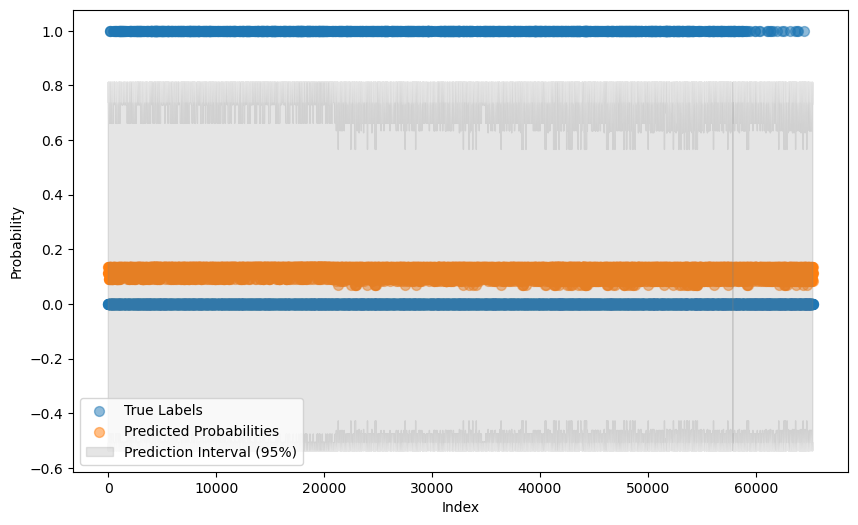

In [24]:
# Calculate the predicted probabilities
pred_probs = reg.predict(x_test)

# Sort the test data and predicted probabilities
sorted_indices = np.argsort(x_test.index)
sorted_x_test = x_test.iloc[sorted_indices]
sorted_pred_probs = pred_probs.iloc[sorted_indices]
sorted_y_test = y_test.iloc[sorted_indices]

# Calculate the prediction interval
lower_bound = sorted_pred_probs - 1.96 * np.sqrt(sorted_pred_probs * (1 - sorted_pred_probs))
upper_bound = sorted_pred_probs + 1.96 * np.sqrt(sorted_pred_probs * (1 - sorted_pred_probs))

# Plot the scatter plot with prediction interval
plt.figure(figsize=(10, 6))
plt.scatter(sorted_x_test.index, sorted_y_test, label="True Labels", alpha=0.5, s=50)
plt.scatter(sorted_x_test.index, sorted_pred_probs, label="Predicted Probabilities", alpha=0.5, s=50)
plt.fill_between(sorted_x_test.index, lower_bound, upper_bound, color='gray', alpha=0.2, label="Prediction Interval (95%)")
plt.xlabel("Index")
plt.ylabel("Probability")
plt.legend()
plt.show()